### Programación lineal

>La programación lineal es el campo de la optimización matemática dedicado a maximizar o minimizar (optimizar) funciones lineales, denominada función objetivo, de tal forma que las variables de dicha función estén sujetas a una serie de restricciones expresadas mediante un sistema de ecuaciones o inecuaciones también lineales.


## 4. Ejemplo básico
Una compañía produce dos productos ($X_1$ y $X_2$) usando dos máquinas ($A$ y $B$). Cada unidad de **$X_1$ que se produce requiere 50 minutos en la máquina $A$** y 30 minutos en la máquina $B$. Cada unidad de **$X_2$ que se produce requiere 24 minutos en la máquina $A$** y 33 minutos en la máquina $B$.

Al comienzo de la semana hay 30 unidades de $X_1$ y 90 unidades de $X_2$ en inventario. El tiempo de uso disponible de la **máquina $A$ es de 40 horas** y el de la máquina $B$ es de 35 horas.

La demanda para $X_1$ en la semana actual es de 75 unidades y de $X_2$ es de 95 unidades. La política de la compañía es maximizar la suma combinada de unidades de $X_1$ e $X_2$ en inventario al finalizar la semana.

Formular el problema de decidir cuánto hacer de cada producto en la semana como un problema de programación lineal.

### Solución

Sean:
- $x_1$ la cantidad de unidades de $X_1$ a ser producidas en la semana, y
- $x_2$ la cantidad de unidades de $X_2$ a ser producidas en la semana.

Notar que lo que se quiere es maximizar $x_1+x_2$.

Restricciones:
1. El tiempo de uso disponible de la máquina $A$ es de 40 horas: $50x_1+24x_2\leq 40(60)\Rightarrow 50x_1+24x_2\leq 2400$.
2. El tiempo de uso disponible de la máquina $B$ es de 35 horas: $30x_1+33x_2\leq 35(60)\Rightarrow 30x_1+33x_2\leq 2100$.
3. La demanda para $X_1$ en la semana actual es de 75 unidades: $x_1+30\geq 75\Rightarrow x_1\geq 45\Rightarrow -x_1\leq -45$.
4. La demanda para $X_2$ en la semana actual es de 95 unidades: $x_2+90\geq 95\Rightarrow x_2\geq 5\Rightarrow -x_2\leq -5$.

$ 50x_1+24x_2\leq 2400$

Finalmente, el problema puede ser expresado en la forma explicada como:
\begin{equation}
\begin{array}{ll}
\min_{x_1,x_2} & -x_1-x_2 \\
\text{s. a. }  & 50x_1+24x_2\leq 2400 \\
               & 30x_1+33x_2\leq 2100 \\
               & -x_1\leq -45 \\
               & -x_2\leq -5,
\end{array}
\end{equation}

o, eqivalentemente 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}
con
- $\boldsymbol{c}=\left[-1 \quad -1\right]^T$,
- $\boldsymbol{A}=\left[\begin{array}{cc}50 & 24 \\ 30 & 33\\ -1 & 0\\ 0 & -1\end{array}\right]$, y
- $\boldsymbol{b}=\left[2400\quad 2100\quad -45\quad -5\right]^T$.

Preferiremos, en adelante, la notación vectorial/matricial.

### Solución Gráfica:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Se tienen las desigualdades:
$$ 50x_1 + 24x_2\leq 2400 $$
$$ 30x_1 + 33x_2\leq 2100 $$ 

Para hacer el plot las pasamos a igualdades y despejamos para una variable:

$$ 50x_1 +24x_2 = 2400 $$
$$ 30x_1 +33x_2 = 2100 $$

El despeje entonces queda:

$$ x_2 = (2400-50x_1)/ 24 $$
$$ x_2 = (2100-30x_1)/ 33 $$

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
def x2_v1(x1):                 #Maquina A
    return (2400 - 50*x1)/24
def x2_v2(x1):                 #Maquina B
    return (2100 - 30*x1)/33

In [10]:
x1 = np.linspace(0, 100)

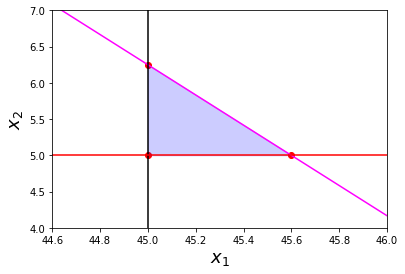

In [54]:
plt.plot(x1, x2_v1(x1), 'magenta')         #Desigualdad 1
plt.plot(x1, x2_v2(x1))                    #Desigualdad 2
plt.plot([45, 45], [0, 25],"k")
plt.scatter([45, 45], [0, 25], color = "red", s = 100)
plt.plot([43, 47], [5, 5], 'r')
plt.scatter([43, 47], [5, 5], color = "red", s = 100)
plt.xlim(xmin = 44.6, xmax = 46)           #Zoom en x      
plt.ylim(ymin = 4, ymax = 7)               #Zoom en y
plt.scatter([45, 45, 45.6], [5, 6.25, 5], color = 'red')   #Punto en el cruce de las lineas
plt.fill_between(np.array([45, 45.6]), x2_v1(np.array([45, 45.6])),
                5*np.ones(2), alpha = .2, color = 'blue')
plt.xlabel(r"$x_1$", fontsize = 18)
plt.ylabel(r"$x_2$", fontsize = 18)
plt.show()

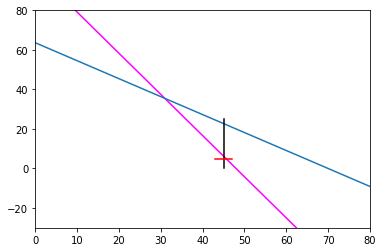

In [52]:
### GRAFICA SIN ZOOM:
plt.plot(x1, x2_v1(x1), 'magenta')        #Desigualdad 1
plt.plot(x1, x2_v2(x1))                   #Desigualdad 2
plt.plot([45, 45], [0, 25], 'k')
plt.plot([43, 47], [5, 5], 'r')
plt.xlim(xmin = 0, xmax = 80)
plt.ylim(ymin = -30, ymax = 80)
#plt.scatter([45], [6.25], color = 'red')
#plt.fill_between(np.array([45, 45.6]), x2_v1(np.array([45, 45.6])),
#                5*np.ones(2), alpha = .2, color = 'orange')
plt.show()

YA TENEMOS UN PUNTO POSIBLE PARA LA SOLUCIÓN, $(45, 5)$. LOS OTROS SON $(45, 6.25)$ $(45.6, 5)$

### Solucion con Algoritmos:

In [56]:
import scipy.optimize as opt

In [ ]:
#res = opt.linprog(c, A_ub=A, b_ub=b, options={'disp': True})

In [57]:
c = np.array([-1, -1])               # min(-x1 -x2)
A = np.array([[50, 24], [30, 33]])
b = np.array([2400, 2100])
x1_bound = (45, None)
x2_bound = (5, None)

In [60]:
res = opt.linprog(c, A_ub=A, b_ub=b, bounds=(x1_bound, x2_bound), options={'disp': True})

Optimization terminated successfully.
         Current function value: -51.250000  
         Iterations: 4


In [61]:
res

     fun: -51.25
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  0.  , 543.75,   0.  ,   1.25])
  status: 0
 success: True
       x: array([45.  ,  6.25])

En inventario teníamos $90$ de $x_2$ y $30$ de $x_1$

## Tarea

**Actividad.** Mónica hace aretes y cadenitas de joyería. Es tan buena, que todo lo que hace lo vende.

Le toma 30 minutos hacer un par de aretes y una hora hacer una cadenita, y como Mónica también es estudihambre, solo dispone de 10 horas a la semana para hacer las joyas. Por otra parte, el material que compra solo le alcanza para hacer 15 unidades (el par de aretes cuenta como unidad) de joyas por semana.

La utilidad que le deja la venta de las joyas es \$15 en cada par de aretes y \$20 en cada cadenita.

¿Cuántos pares de aretes y cuántas cadenitas debería hacer Mónica para maximizar su utilidad?

#### Solucion con Algoritmos:

In [62]:
import numpy as np

In [63]:
c = np.array([-15, -20])           # min(-x1 -x2)
A = np.array([[0.5, 1], [1, 1]])   
b = np.array([10, 15])
x1_cota = (0, None)
x2_cota = (0, None)

In [64]:
res_mon = opt.linprog(c=c, A_ub=A, b_ub=b, bounds = (x1_cota,x2_cota))

In [65]:
res_mon

     fun: -250.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([10.,  5.])

Esto nos dice que Monica deberia hacer 10 pares de aretes y 5 cadenas para lograr maximizar su utiliddad.

#### Solucion Geométrica:

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Par de aretes: $30$ min.

Cadena:        $1$ hora.  

$$ 10x_1 + 5x_2 = 250 $$

Donde:

$ x_1 = Par de aretes $

$ x_2 = Cadena $
$$ 10(15) + 5(20) = 250 $$

Despejando los Aretes ($x_1$):

$$ x_1 = (250 - 5x_2)/10 $$

Despejando las Cadenas ($x_2$):

$$ x_2 = (250 - 10x_1)/5 $$

In [97]:
def x2_v1(x1):                 #Despejando Aretes
    return (250 - 5*x2)/10
def x2_v2(x1):                 #Despejando Cadenas
    return (250 - 10*x1)/5

In [98]:
x1 = np.linspace(0,100)

(0, 35)

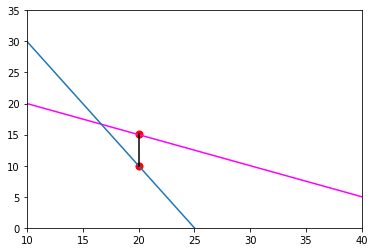

In [116]:
plt.plot(x1, x2_v1(x1), 'magenta')         #Desigualdad 1
plt.plot(x1, x2_v2(x1))                    #Desigualdad 2
plt.plot([20, 20], [10, 15.1],"k")
plt.scatter([20, 20], [10, 15.1], color = "red", s = 50)
#plt.plot([43, 47], [5, 5], 'r')
#plt.scatter([43, 47], [5, 5], color = "red", s = 100)
plt.xlim(xmin = 10, xmax = 40)           #Zoom en x      
plt.ylim(ymin = 0, ymax = 35)               #Zoom en y
#plt.scatter([45, 45, 45.6], [5, 6.25, 5], color = 'red')   #Punto en el cruce de las lineas
#plt.fill_between(np.array([45, 45.6]), x2_v1(np.array([45, 45.6])),
#                5*np.ones(2), alpha = .2, color = 'blue')
#plt.xlabel(r"$x_1$", fontsize = 18)
#plt.ylabel(r"$x_2$", fontsize = 18)
#plt.show()